In [12]:
import matplotlib.pyplot as plt

from clip.clip import load
from concept_extraction.concept_extraction import (
    load_concepts,
    load_sae,
    prepare_image,
    prepare_image_from_datasets,
    extract_concepts,
)

In [13]:
concept_names = load_concepts("concept_names/clip_ViT-B_16_concept_names.csv")

In [14]:
ViT_B_16_clip, image_transfrom = load("ViT-B/16")

In [17]:
sparse_autoencoder = load_sae(
    "sae_checkpoints/clip_ViT-B_16_sparse_autoencoder_final.pt"
)

In [18]:
image, image_transformed = prepare_image("sample_image.JPEG", image_transfrom)

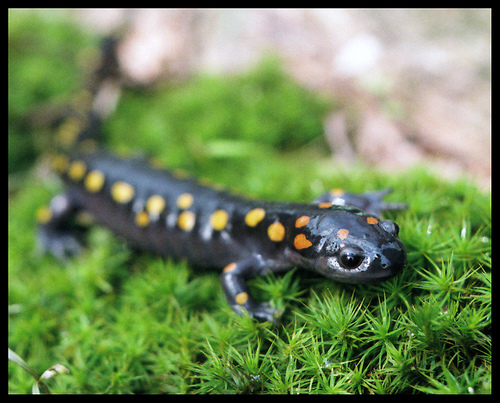

In [19]:
image

In [20]:
N_CONCEPTS = 10

top_n_concept_activations, top_n_concept_names = extract_concepts(
    n_concepts=N_CONCEPTS,
    concept_names=concept_names,
    image_transformed=image_transformed,
    clip_model=ViT_B_16_clip,
    sae=sparse_autoencoder,
)

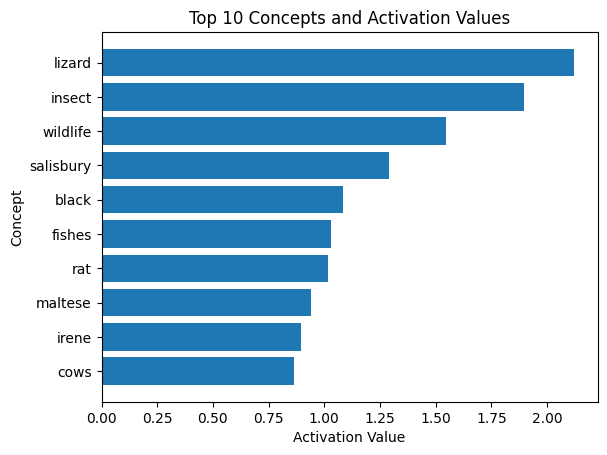

In [21]:
plt.barh(top_n_concept_names, top_n_concept_activations)
plt.xlabel("Activation Value")
plt.ylabel("Concept")
plt.title(f"Top {N_CONCEPTS} Concepts and Activation Values")
plt.show()

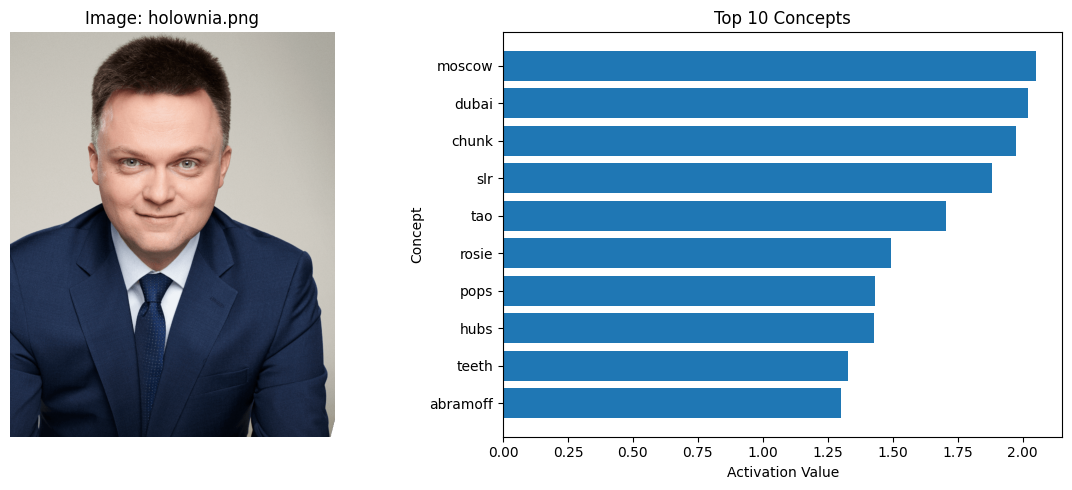

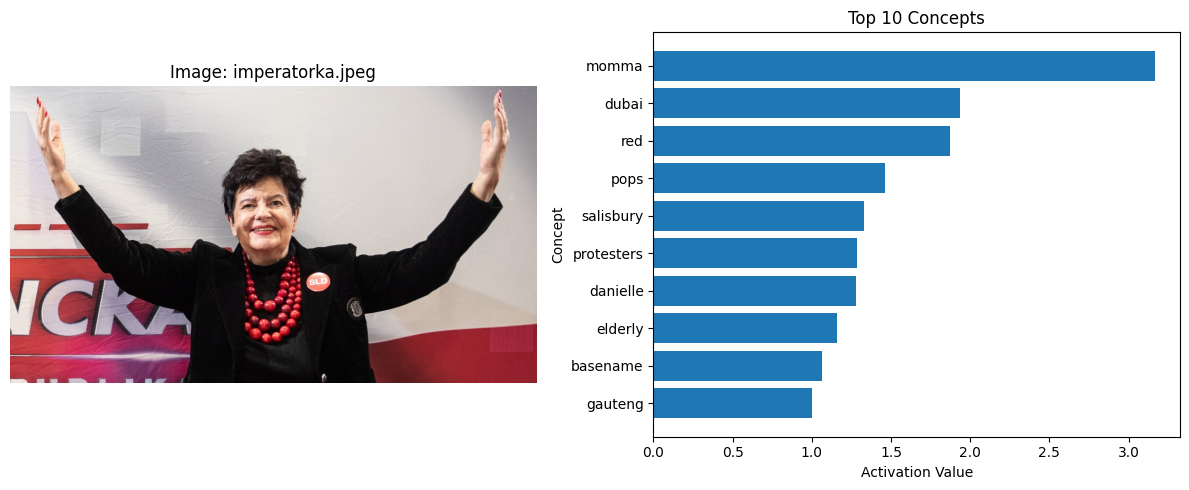

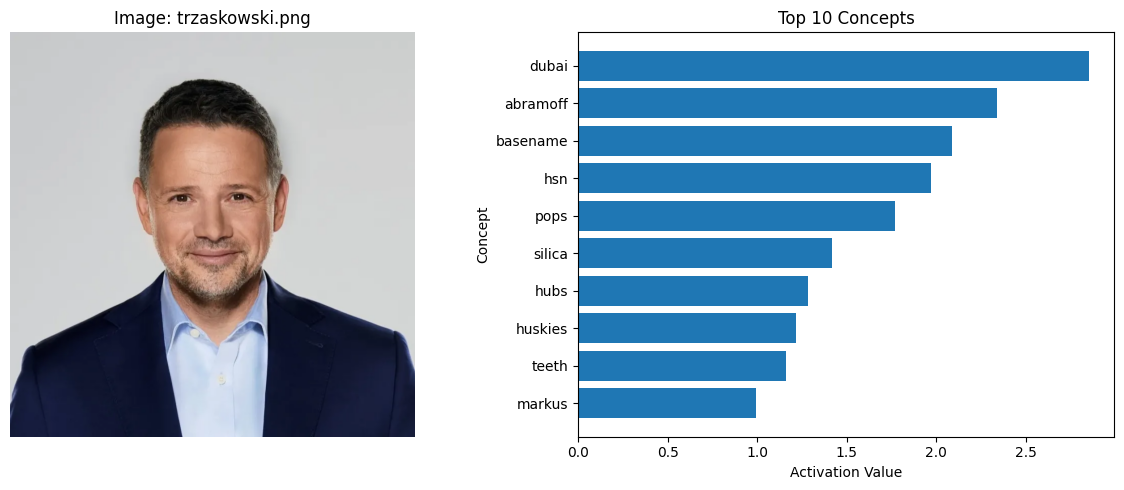

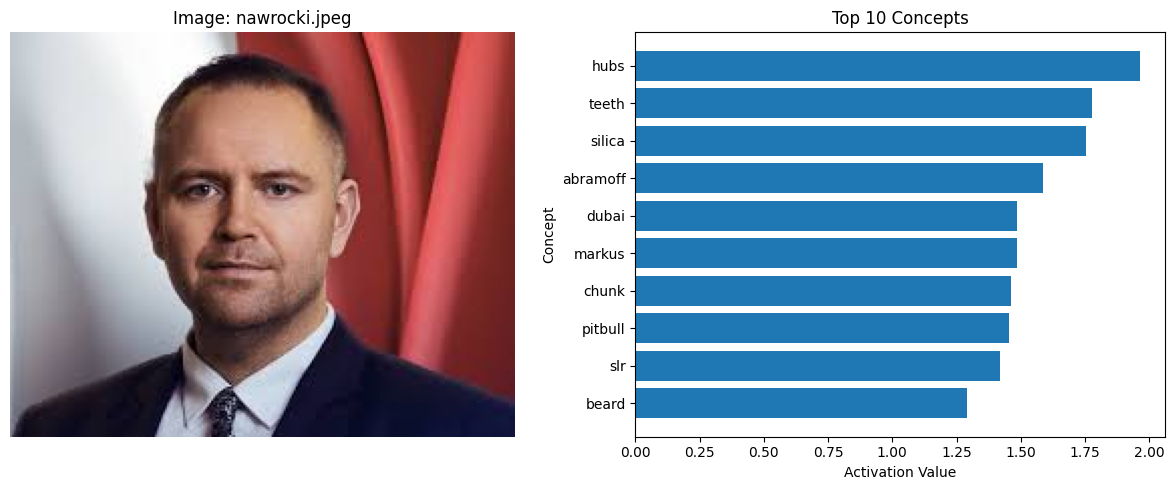

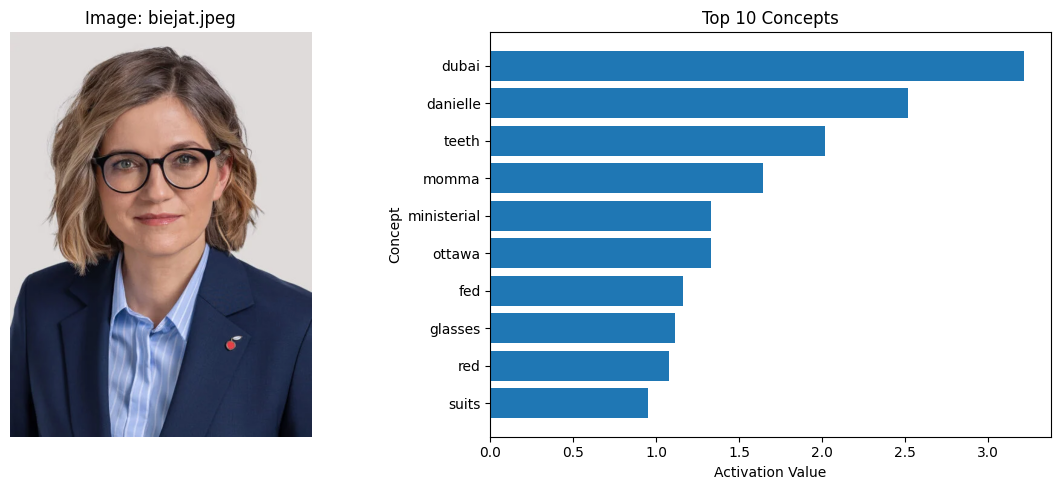

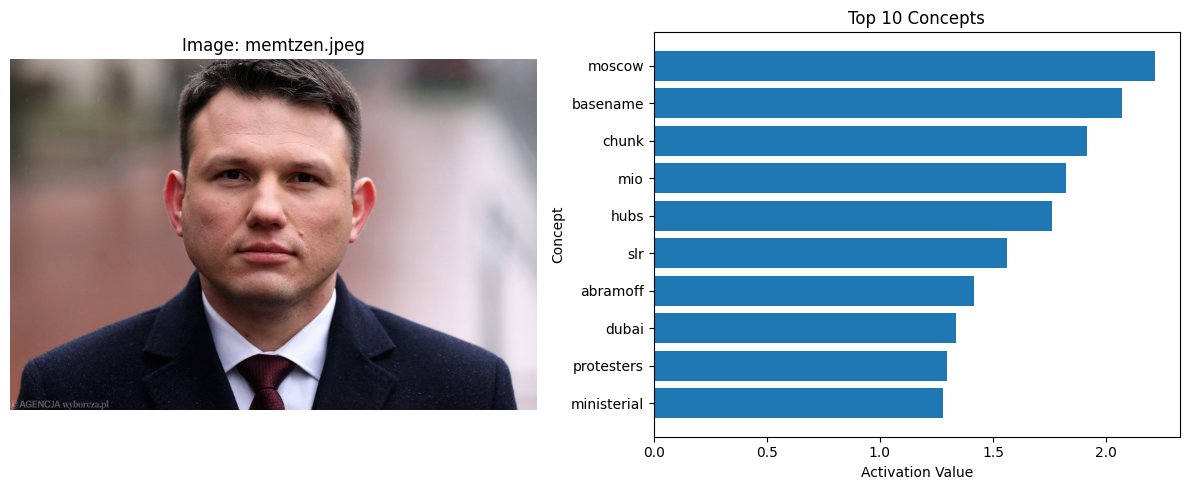

In [22]:
import os

election_directory = "images/election"

for filename in os.listdir(election_directory):
    if filename.lower().endswith((".png", ".jpg", ".jpeg")):
        file_path = os.path.join(election_directory, filename)
        image, image_transformed = prepare_image(file_path, image_transfrom)

        top_n_concept_activations, top_n_concept_names = extract_concepts(
            n_concepts=N_CONCEPTS,
            concept_names=concept_names,
            image_transformed=image_transformed,
            clip_model=ViT_B_16_clip,
            sae=sparse_autoencoder,
        )

        fig, axs = plt.subplots(1, 2, figsize=(12, 5))

        axs[0].imshow(image)
        axs[0].axis("off")
        axs[0].set_title(f"Image: {filename}")

        axs[1].barh(top_n_concept_names, top_n_concept_activations)
        axs[1].set_xlabel("Activation Value")
        axs[1].set_ylabel("Concept")
        axs[1].set_title(f"Top {N_CONCEPTS} Concepts")

        plt.tight_layout()
        plt.show()

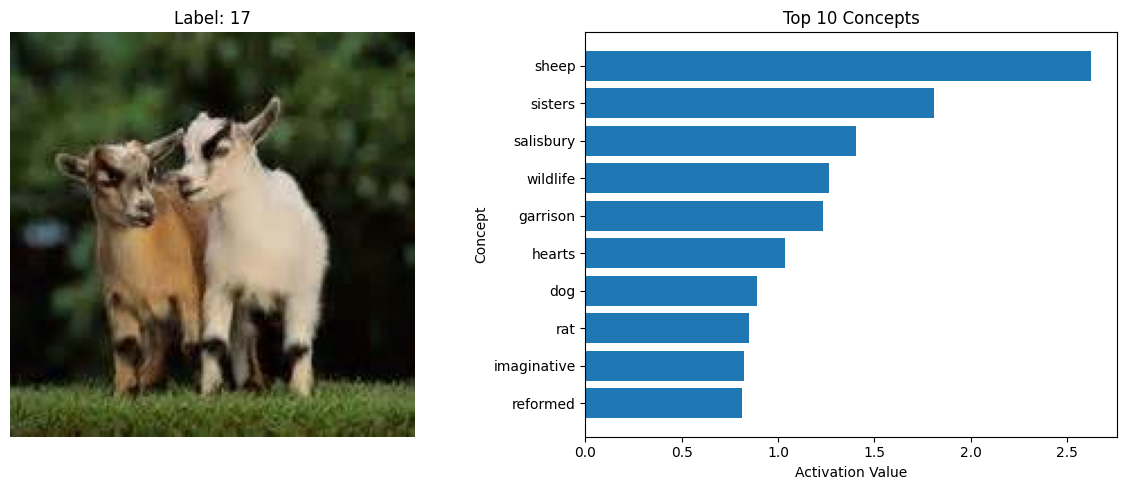

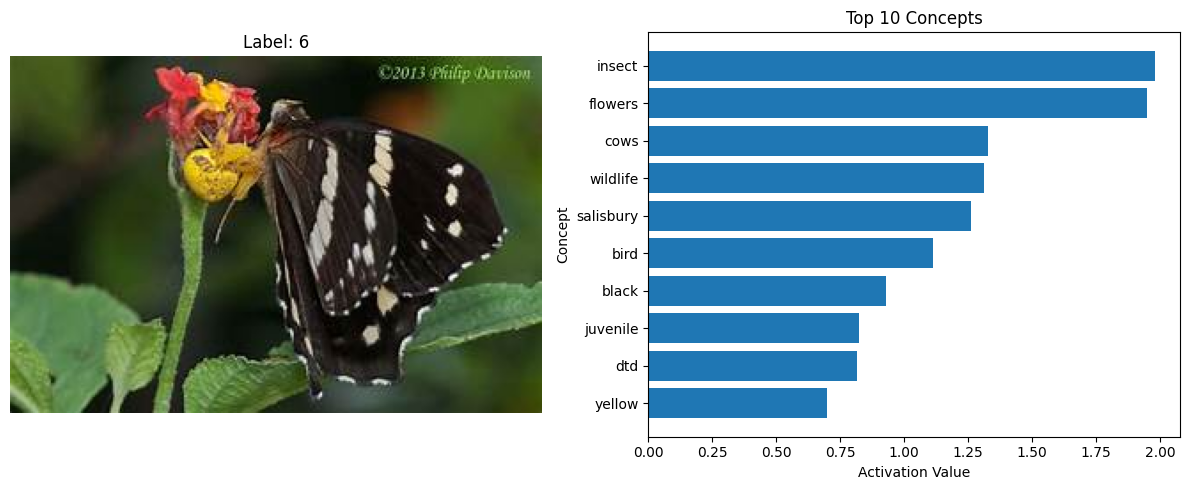

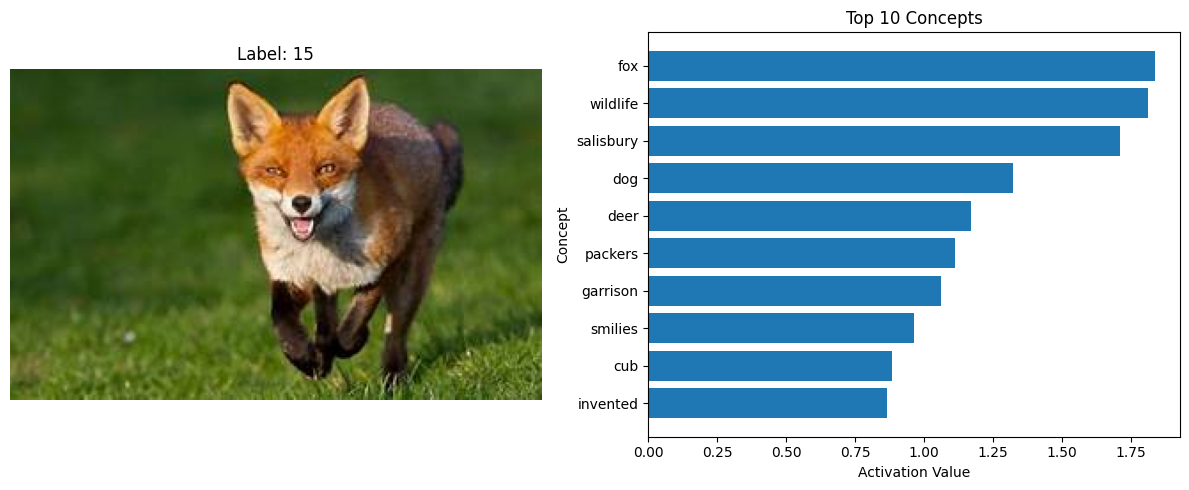

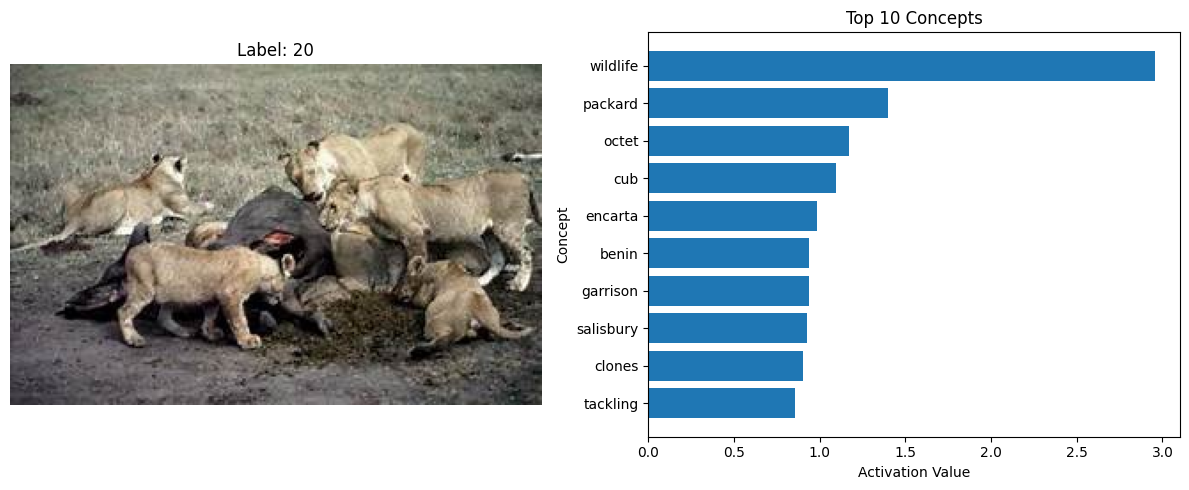

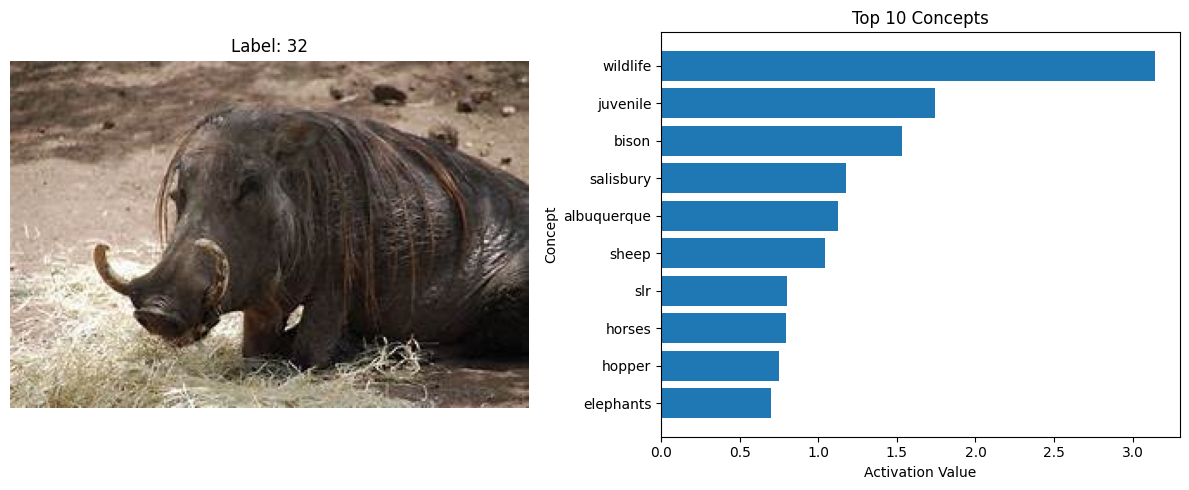

In [26]:
from torchvision import transforms
from PIL import Image
from datasets import load_dataset
import random

dataset = load_dataset("Rapidata/Other-Animals-10", split="train")

preprocess = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

samples = random.sample(list(dataset), 5)

for sample in samples:
    image = sample["image"]
    label = sample["label"]
    image, image_transformed = prepare_image_from_datasets(image, preprocess)

    top_n_concept_activations, top_n_concept_names = extract_concepts(
        n_concepts=N_CONCEPTS,
        concept_names=concept_names,
        image_transformed=image_transformed,
        clip_model=ViT_B_16_clip,
        sae=sparse_autoencoder,
    )

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].imshow(image)
    axs[0].axis("off")
    axs[0].set_title(f"Label: {label}")

    axs[1].barh(top_n_concept_names, top_n_concept_activations)
    axs[1].set_xlabel("Activation Value")
    axs[1].set_ylabel("Concept")
    axs[1].set_title(f"Top {N_CONCEPTS} Concepts")

    plt.tight_layout()
    plt.show()